# Extracting the Data

In [97]:
# Required libraries
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import xarray as xr
import sys
import re
from tqdm import tqdm
from datetime import datetime

# Reading and extracting files for the year 2004

In [54]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2004"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20041001.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041002.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041003.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041004.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041005.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041006.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041007.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041008.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041009.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041010.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041011.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041012.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041013.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041014.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041015.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041016.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041017.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041018.he5 with shape (720, 1440)
✅ Loaded omi_no2_20041019.he5 with shape (720,

# Converting .he5 files into .nc for the year 2004

In [55]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2004"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041001.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041002.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041003.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041004.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041005.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041006.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041007.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041008.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041009.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041010.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004/omi_no2_20041011.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas region for 2004

In [ ]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2004"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041001.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041002.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041003.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041004.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041005.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041006.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041007.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041008.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2004/omi_no2_Texas_20041009.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2004

✅ Found 363 files for 2004.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2004 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2004_annual_mean.nc


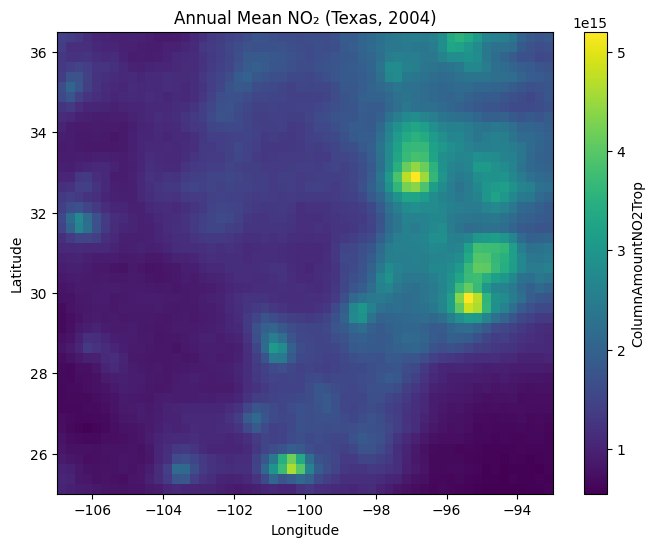

✅ Mean of daily means: 1538762212190828.2
✅ Overall mean from annual_mean: 1524839554744320.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [237]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2004_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2004.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2004 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2004)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading and extracting files for 2005

In [75]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2005"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20050101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20050119.he5 with shape (720,

# Extracting files for the Texas region for 2005

In [78]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2005"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/omi_no2_Texas_20050109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2005

✅ Found 365 files for 2005.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2005 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2005_annual_mean.nc


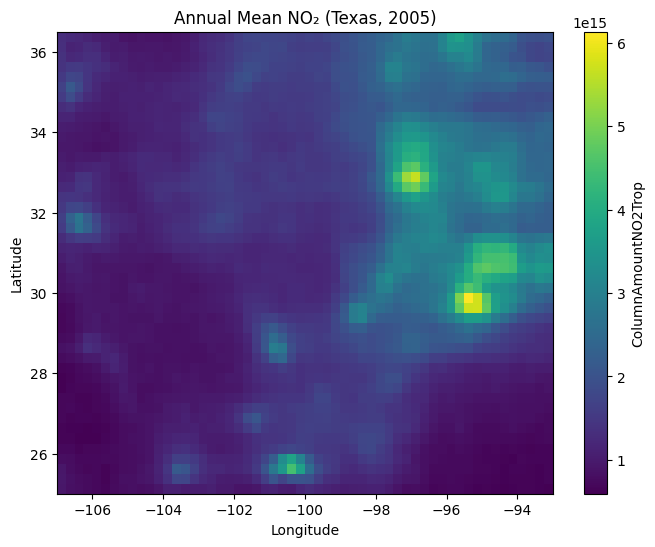

✅ Mean of daily means: 1658836695333133.2
✅ Overall mean from annual_mean: 1636896459456512.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [256]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2005/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2005_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2005.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2005 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2005)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading and extracting files for 2006

In [83]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2006"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20060101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20060119.he5 with shape (720,

# Converting .he5 files into .nc for 2006

In [84]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2006"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006/omi_no2_20060111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas region for 2006

In [85]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2006"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/omi_no2_Texas_20060109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2006

✅ Found 363 files for 2006.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2006 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2006_annual_mean.nc


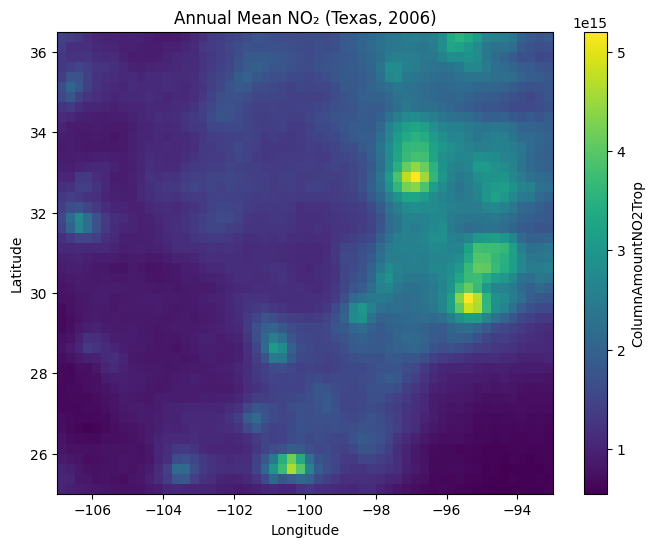

✅ Mean of daily means: 1538762212190828.2
✅ Overall mean from annual_mean: 1524839554744320.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [257]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2006/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2006_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2006.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2006 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2006)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2007

In [90]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2007"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20070101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20070119.he5 with shape (720,

# Converting .he5 files into .nc files for the year 2007

In [91]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2007"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007/omi_no2_20070111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas region for 2007

In [92]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2007"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/omi_no2_Texas_20070109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2007

✅ Found 365 files for 2007.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2007 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2007_annual_mean.nc


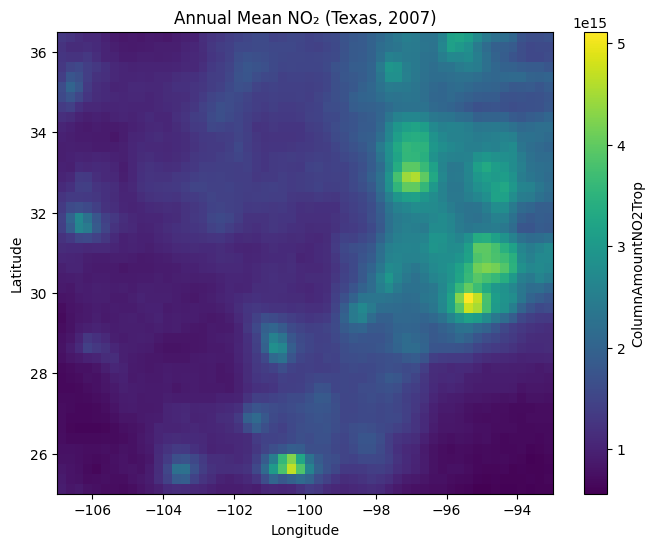

✅ Mean of daily means: 1534622496266462.2
✅ Overall mean from annual_mean: 1518794388275200.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [258]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2007/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2007_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2007.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2007 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2007)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2008

In [98]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2008"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20080101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20080119.he5 with shape (720,

# Converting .he5 files into .nc for the year 2008

In [99]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2008"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008/omi_no2_20080111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for 2008

In [100]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2008"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/omi_no2_Texas_20080109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2008

✅ Found 364 files for 2008.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2008 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2008_annual_mean.nc


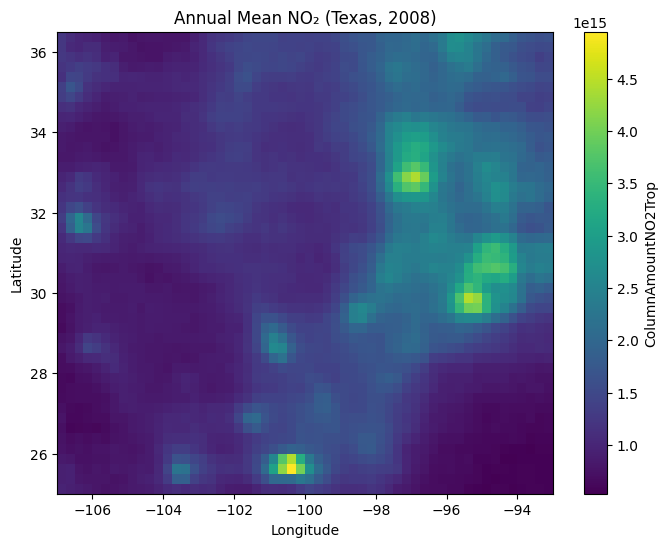

✅ Mean of daily means: 1416404313713229.2
✅ Overall mean from annual_mean: 1397675639439360.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [259]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2008/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2008_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2008.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2008 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2008)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2009

In [103]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2009"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20090101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20090119.he5 with shape (720,

# Converting .he5 files into .nc for 2009

In [104]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2009"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009/omi_no2_20090111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas region for 2009

In [105]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2009"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/omi_no2_Texas_20090109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2009

✅ Found 365 files for 2009.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2009 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2009_annual_mean.nc


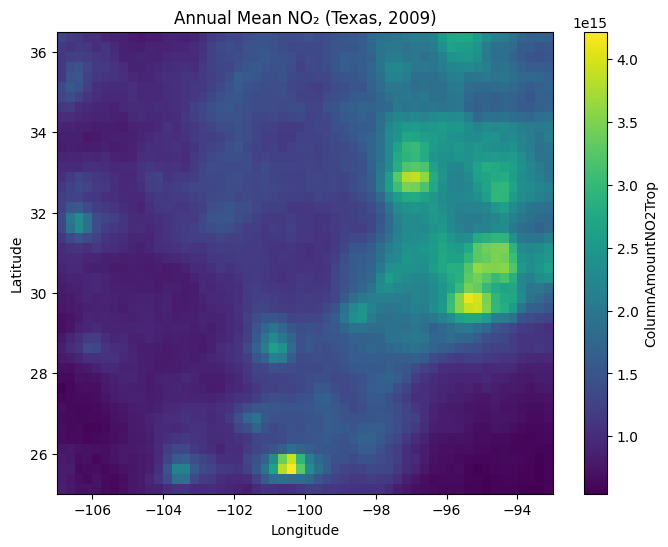

✅ Mean of daily means: 1443197598379222.0
✅ Overall mean from annual_mean: 1413243419492352.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [260]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2009/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2009_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2009.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2009 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2009)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2010

In [108]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2010"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20100101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20100119.he5 with shape (720,

# Converting .he5 files into .nc for 2010

In [109]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2010"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010/omi_no2_20100111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for 2010

In [110]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2010"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/omi_no2_Texas_20100109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2010

✅ Found 365 files for 2010.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2010 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2010_annual_mean.nc


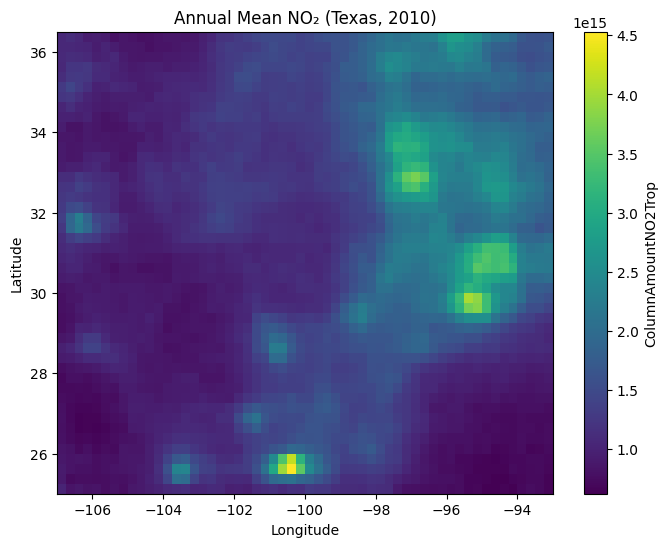

✅ Mean of daily means: 1433319862317356.8
✅ Overall mean from annual_mean: 1408279108386816.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [255]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2010/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2010_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2010.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2010 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2010)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2011

In [113]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2011"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20110101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20110119.he5 with shape (720,

# Converting .he5 files into .nc for the year 2011

In [114]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2011"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011/omi_no2_20110111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for 2011

In [115]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2011"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/omi_no2_Texas_20110109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2011

✅ Found 365 files for 2011.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2011 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2011_annual_mean.nc


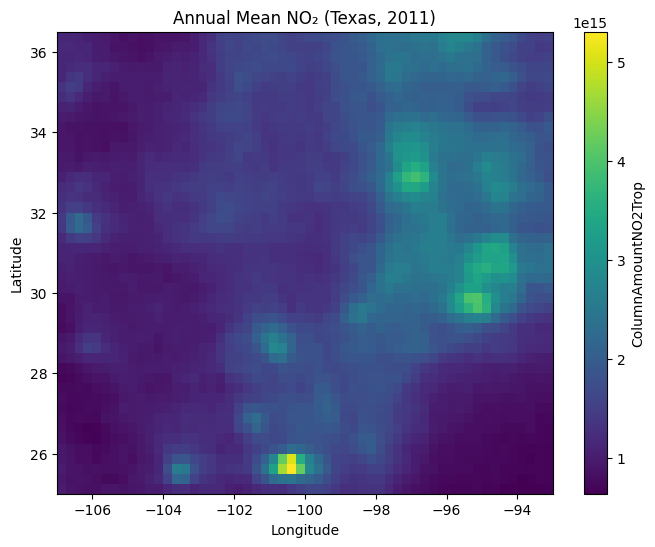

✅ Mean of daily means: 1555646960489968.0
✅ Overall mean from annual_mean: 1539261383835648.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [254]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2011/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2011_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2011.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2011 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2011)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2012

In [118]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2012"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20120101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20120119.he5 with shape (720,

# Converting .he5 files into .nc for the year 2012

In [119]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2012"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012/omi_no2_20120111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for 2012

In [120]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2012"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/omi_no2_Texas_20120109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2012

✅ Found 366 files for 2012.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2012 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2012_annual_mean.nc


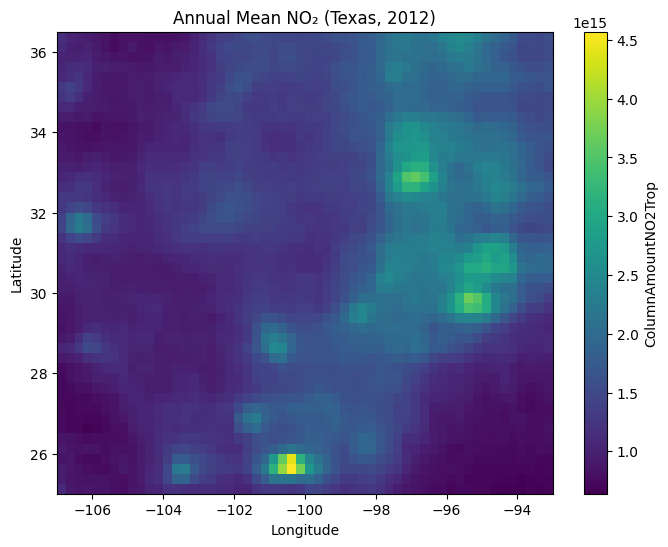

✅ Mean of daily means: 1450344294269897.2
✅ Overall mean from annual_mean: 1438415954378752.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [253]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2012/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2012_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2012.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2012 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2012)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2013

In [123]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2013"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20130101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20130119.he5 with shape (720,

# Converting .he5 files into .nc for 2013

In [124]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2013"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013/omi_no2_20130111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for the year 2013

In [125]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2013"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")


✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/omi_no2_Texas_20130109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2013



✅ Found 365 files for 2013.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2013 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2013_annual_mean.nc


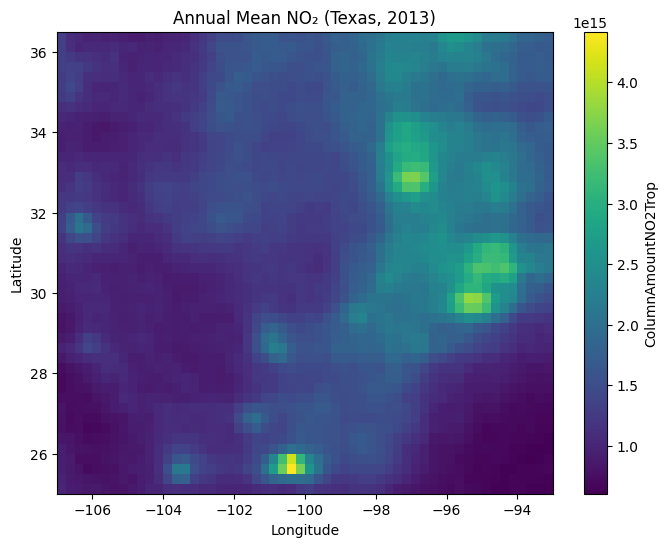

✅ Mean of daily means: 1474518297781964.5
✅ Overall mean from annual_mean: 1456996519772160.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [252]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2013/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2013_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2013.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2013 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2013)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2014

In [128]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2014"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20140101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20140119.he5 with shape (720,

# Converting .he5 files into .nc for the year 2014

In [129]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2014"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014/omi_no2_20140111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for the year 2014

In [130]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2014"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/omi_no2_Texas_20140109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2014

✅ Found 365 files for 2014.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2014 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2014_annual_mean.nc


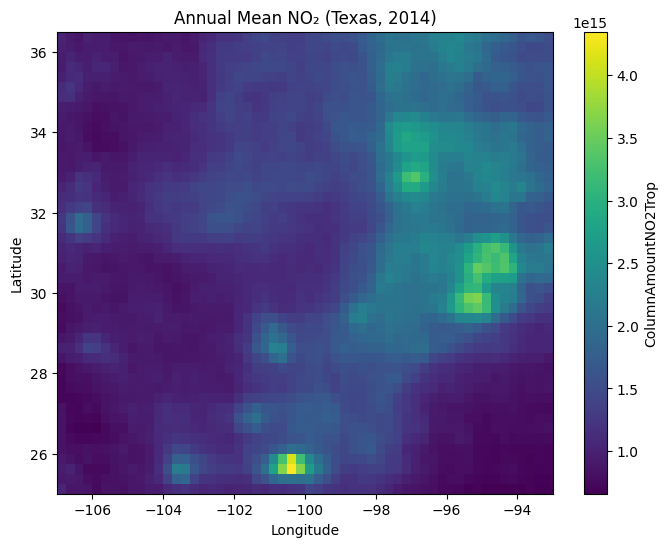

✅ Mean of daily means: 1420988670592322.0
✅ Overall mean from annual_mean: 1398307402285056.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [251]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2014/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2014_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2014.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2014 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2014)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2015

In [133]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2015"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20150101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20150119.he5 with shape (720,

# Converting .he5 files into .NC for 2015

In [134]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2015"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015/omi_no2_20150111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas resion for 2015

In [135]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2015"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/omi_no2_Texas_20150109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2015

✅ Found 365 files for 2015.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2015 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2015_annual_mean.nc


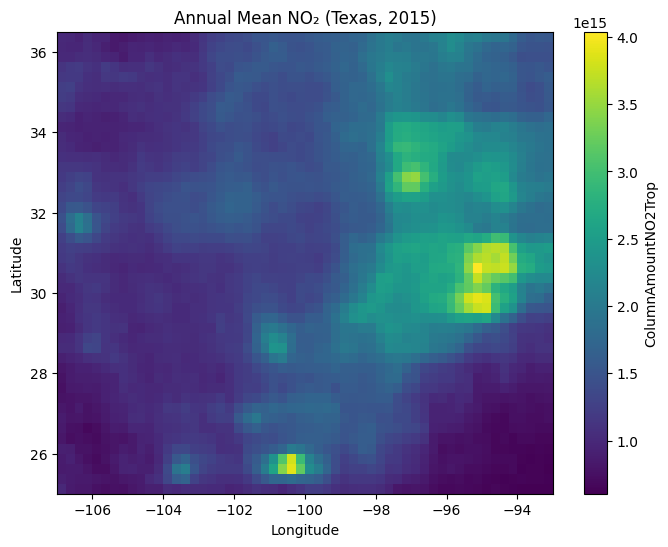

✅ Mean of daily means: 1526786450187397.0
✅ Overall mean from annual_mean: 1494860414582784.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [250]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2015/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2015_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2015.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2015 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2015)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2016

In [138]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2016"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20160101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20160119.he5 with shape (720,

# Converting .he5 files into .NC for 2016

In [139]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2016"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016/omi_no2_20160111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region  for 2016

In [140]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2016"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/omi_no2_Texas_20160109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2016

✅ Found 353 files for 2016.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2016 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2016_annual_mean.nc


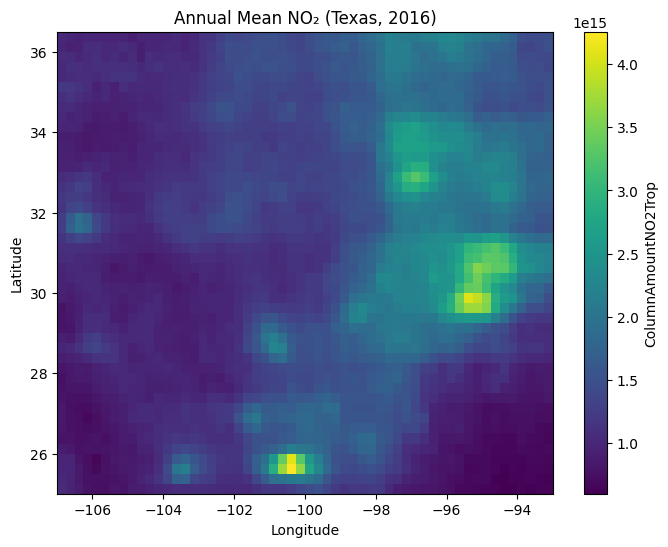

✅ Mean of daily means: 1441048860421614.0
✅ Overall mean from annual_mean: 1421499957248000.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [261]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2016/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2016_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2016.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2016 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2016)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2017

In [189]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2017"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20170101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20170119.he5 with shape (720,

# Converting .he5 files into .NC for 2017

In [190]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2017"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017/omi_no2_20170111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas region for 2017

In [191]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2017"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/omi_no2_Texas_20170109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2017

✅ Found 361 files for 2017.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2017 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2017_annual_mean.nc


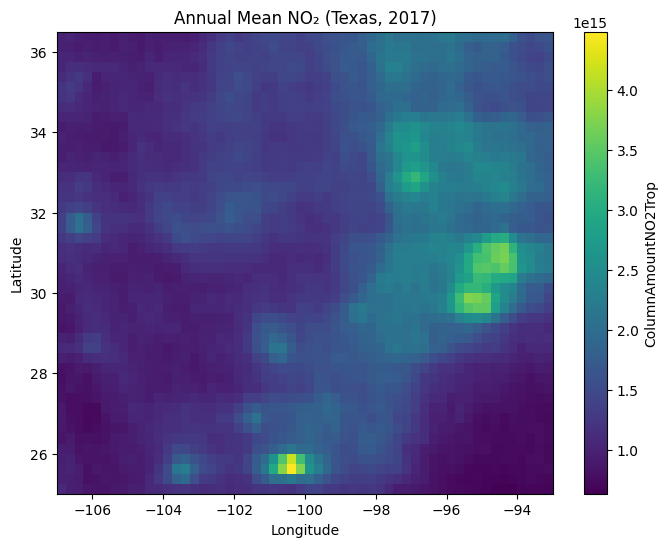

✅ Mean of daily means: 1472773541609612.8
✅ Overall mean from annual_mean: 1449515223613440.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [262]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2017/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2017_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2017.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2017 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2017)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2018

In [144]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2018"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20180101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20180119.he5 with shape (720,

# Converting .he5 files into .nc for 2018

In [145]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2018"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018/omi_no2_20180111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting fils for the Texas region for 2018

In [146]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2018"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/omi_no2_Texas_20180109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2018

✅ Found 365 files for 2018.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2018 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2018_annual_mean.nc


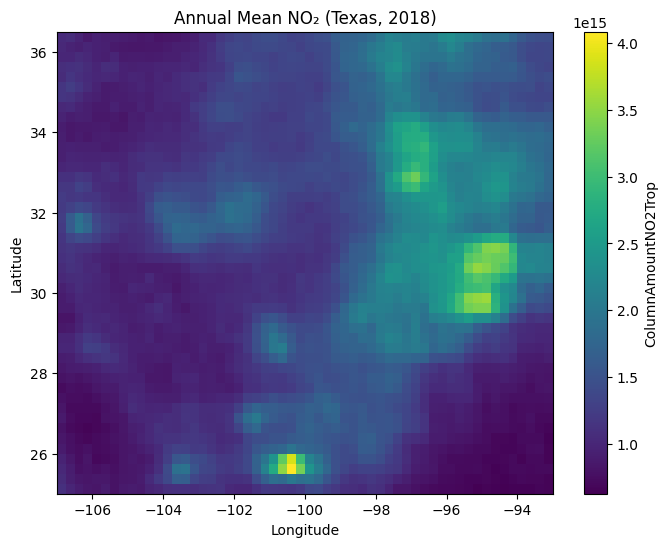

✅ Mean of daily means: 1446824159687920.8
✅ Overall mean from annual_mean: 1410449543266304.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [263]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2018/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2018_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2018.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2018 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2018)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2019

In [149]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2019"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20190101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20190119.he5 with shape (720,

# Conveting .he5 files into .nc for 2019

In [150]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2019"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019/omi_no2_20190111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for 2019

In [151]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2019"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/omi_no2_Texas_20190109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for 2019

✅ Found 365 files for 2019.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2019 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2019_annual_mean.nc


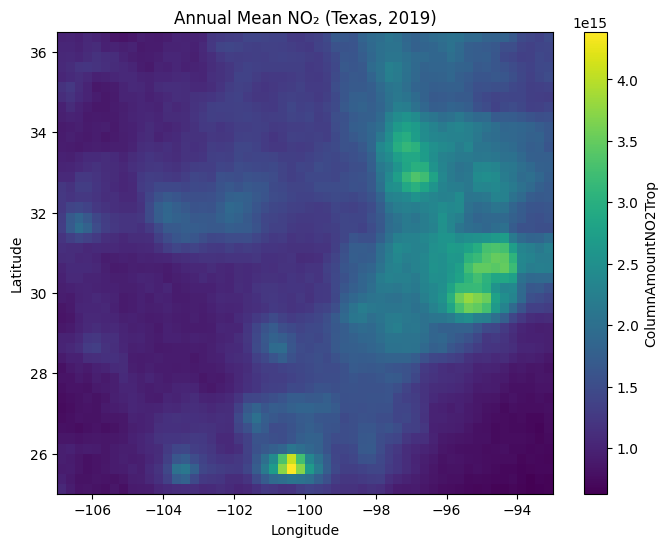

✅ Mean of daily means: 1448468442870338.5
✅ Overall mean from annual_mean: 1436346182795264.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [264]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2019/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2019_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2019.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2019 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2019)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2020

In [154]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2020"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20200101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20200119.he5 with shape (720,

# Converting .he5 files into .nc for the year 2020

In [155]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2020"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020/omi_no2_20200111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas resion for the year 2020

In [156]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2020"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/omi_no2_Texas_20200109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2020

✅ Found 366 files for 2020.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2020 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2020_annual_mean.nc


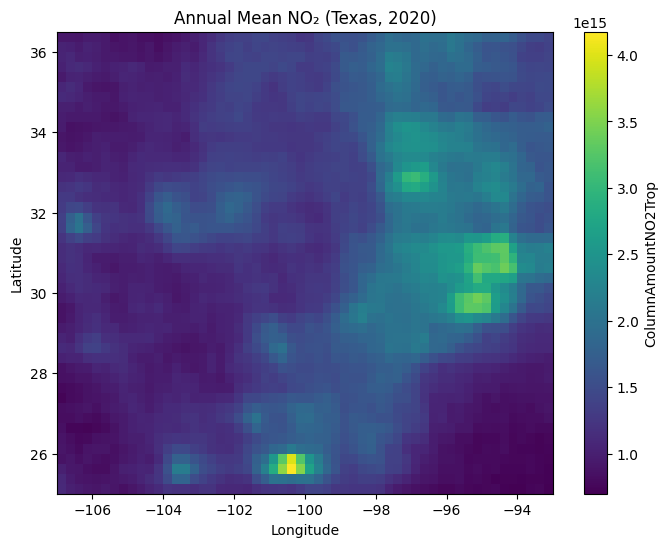

✅ Mean of daily means: 1447391860651394.0
✅ Overall mean from annual_mean: 1428918707945472.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [265]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2020/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2020_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2020.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2020 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2021

In [159]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2021"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20210101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20210119.he5 with shape (720,

# Converting .he5 files into .nc for the year 2021

In [160]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2021"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021/omi_no2_20210111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for 2021

In [161]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2021"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/omi_no2_Texas_20210109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2021

✅ Found 365 files for 2021.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2021 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2021_annual_mean.nc


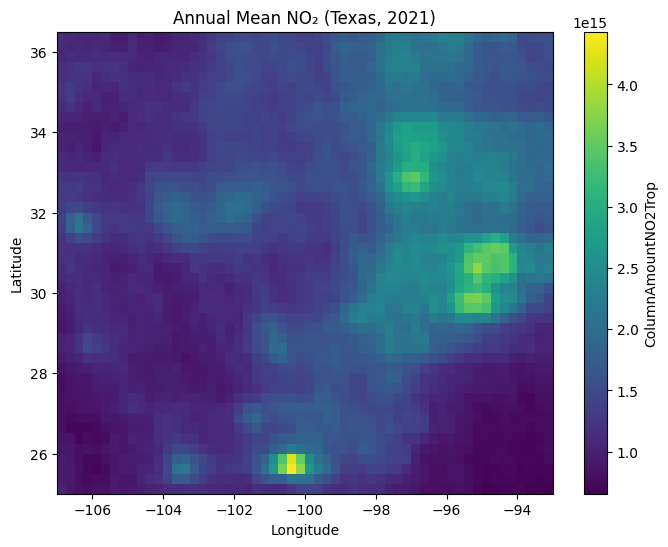

✅ Mean of daily means: 1529288379866844.2
✅ Overall mean from annual_mean: 1497592819089408.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [266]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2021/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2021_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2021.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2021 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2021)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files 2022

In [164]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2022"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20220101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20220119.he5 with shape (720,

# Converting .he5 files into .nc for the year 2022

In [165]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2022"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022/omi_no2_20220111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas reion for 2022

In [166]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2022"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/omi_no2_Texas_20220109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2022

✅ Found 365 files for 2022.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2022 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2022_annual_mean.nc


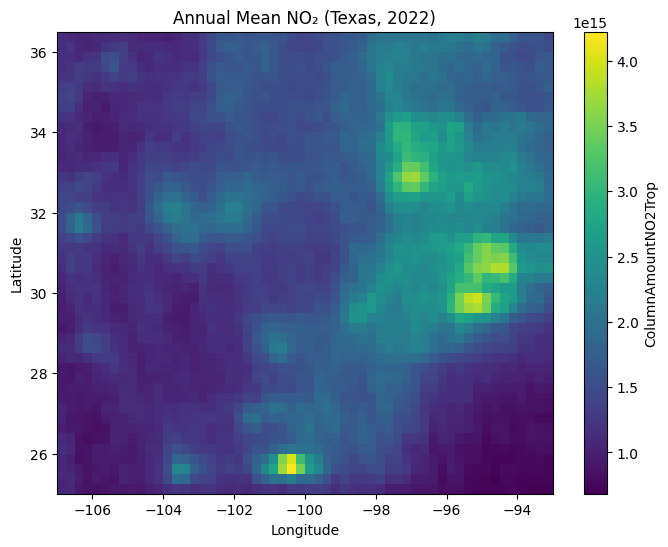

✅ Mean of daily means: 1610404236318517.5
✅ Overall mean from annual_mean: 1587810754625536.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [267]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2022/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2022_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2022.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2022 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for the year 2023

In [169]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2023"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20230101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20230119.he5 with shape (720,

# Converting .he5 into .nc files for 2023

In [170]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2023"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023/omi_no2_20230111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting files for the Texas region for 2023

In [171]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2023"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/omi_no2_Texas_20230109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2023

✅ Found 364 files for 2023.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2023 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2023_annual_mean.nc


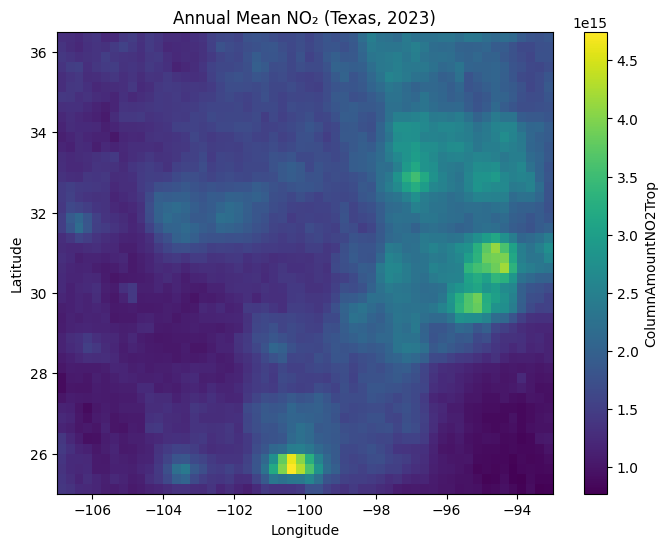

✅ Mean of daily means: 1690857998769291.0
✅ Overall mean from annual_mean: 1656719881011200.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [268]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2023/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2023_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2023.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2023 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2024

In [174]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2024"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20240101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20240119.he5 with shape (720,

# Converting .he5 files into .nc for 2024

In [180]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2024"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024/omi_no2_20240111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas region for 2024

In [181]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2024"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/omi_no2_Texas_20240109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2024

✅ Found 365 files for 2024.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2024 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2024_annual_mean.nc


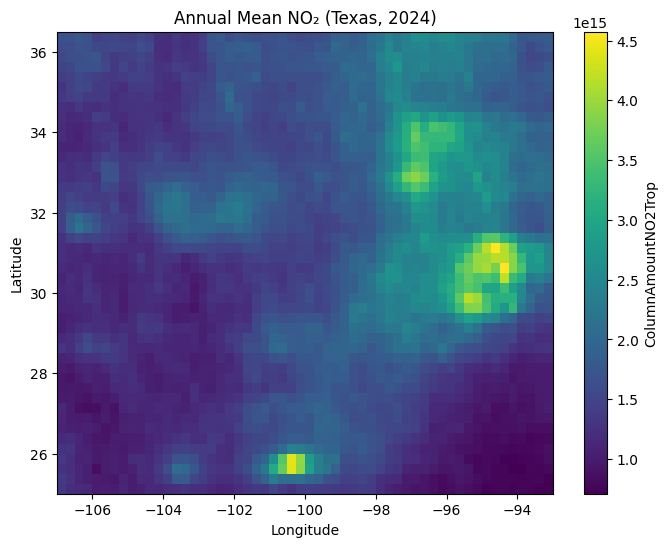

✅ Mean of daily means: 1750887391622856.0
✅ Overall mean from annual_mean: 1687122209669120.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [269]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2024/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2024_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2024.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2024 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Reading .he5 files for 2025

In [184]:
data_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2025"
# Path 
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# Initialize lists
dates = []
no2_data = []

# Loop through files
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(data_dir, filename)
        
        # Extract date from filename (omi_O3_YYYYMMDD.he5)
        match = re.search(r'(\d{8})', filename)
        if match:
            date = match.group(1)
        else:
            date = 'unknown'
        
        with h5py.File(file_path, 'r') as f:
            if data_path in f:
                data = f[data_path][()]
                data = np.where(data < 0, np.nan, data)  # Filter invalid values
                
                dates.append(date)
                no2_data.append(data)
                print(f"✅ Loaded {filename} with shape {data.shape}")
            else:
                print(f"❌ {filename} missing {data_path}")

print(f"\nTotal files read: {len(no2_data)}")

# Print first file shape
if no2_data:
    print(f"First file shape: {no2_data[0].shape}")

✅ Loaded omi_no2_20250101.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250102.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250103.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250104.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250105.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250106.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250107.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250108.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250109.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250110.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250111.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250112.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250113.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250114.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250115.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250116.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250117.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250118.he5 with shape (720, 1440)
✅ Loaded omi_no2_20250119.he5 with shape (720,

# Converting .he5 files in nc for 2025

In [185]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/OMI_NO2_Data/2025"
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025"
os.makedirs(output_dir, exist_ok=True)

# Data path inside HDF5
data_path = '/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'
            
# Loop through each HE5 file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.he5'):
        file_path = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        if not match:
            print(f"Skipping {filename} (no date found)")
            continue
        
        date_str = match.group(1)
        
        with h5py.File(file_path, 'r') as f:
            if data_path not in f:
                print(f"Data field missing in {filename}")
                continue
            
            data = f[data_path][()]
            data = np.where(data < 0, np.nan, data)  # Filter invalid values
            
            # Get grid size and compute lat/lon dynamically
            nrows, ncols = data.shape
            lat = np.linspace(-90 + 0.125, 90 - 0.125, nrows)
            lon = np.linspace(-180 + 0.125, 180 - 0.125, ncols)
            
            # Create Dataset
            ds = xr.Dataset(
                {
                    "ColumnAmountNO2Trop": (("lat", "lon"), data)
                },
                coords={
                    "lat": lat,
                    "lon": lon,
                    "time": [np.datetime64(date_str)]
                },
                attrs={
                    "title": "OMI Tropospheric NO2 Column Density",
                    "source": "OMNO2d.003",
                    "date": date_str,
                    "units": "molec/cm2"
                }
            )
            
            # Save as NetCDF
            output_file = os.path.join(output_dir, f"omi_no2_{date_str}.nc")
            ds.to_netcdf(output_file)
            print(f"✅ Saved {output_file}")


✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250101.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250102.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250103.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250104.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250105.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250106.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250107.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250108.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250109.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250110.nc
✅ Saved /Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025/omi_no2_20250111.nc
✅ Saved /Users/nawarajadhikari/C

# Extracting the files for the Texas region for 2025

In [186]:
# Input and output directories
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_NetCDF/2025"  # Folder with converted NO₂ .nc files
output_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025"
os.makedirs(output_dir, exist_ok=True)

# Texas bounding box
lat_min, lat_max = 25, 36.5
lon_min, lon_max = -107, -93

# Loop through each NO₂ NetCDF file
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        input_file = os.path.join(input_dir, filename)
        
        # Extract date from filename
        match = re.search(r'(\d{8})', filename)
        date_str = match.group(1) if match else "unknown"
        
        # Open original NetCDF file WITHOUT decoding time
        ds = xr.open_dataset(input_file, decode_times=False)
        
        # Subset Texas region
        ds_texas = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
        
        # Remove all encodings (prevents time issues in output)
        for var in ds_texas.variables:
            ds_texas[var].encoding.clear()
        
        # Save Texas subset
        output_file = os.path.join(output_dir, f"omi_no2_Texas_{date_str}.nc")
        ds_texas.to_netcdf(output_file)
        
        print(f"✅ Saved Texas subset: {output_file}")

✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250101.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250102.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250103.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250104.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250105.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250106.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250107.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250108.nc
✅ Saved Texas subset: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/omi_no2_Texas_20250109.nc
✅ Saved Texas subset: /Users/nawaraja

# Computation of Annual Mean for the year 2025

✅ Found 199 files for 2025.
✅ Variable name detected: ColumnAmountNO2Trop
✅ Cleaning completed (Removed FillValue, missing values, negatives).
✅ Annual mean NO₂ for 2025 saved at: /Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2025_annual_mean.nc


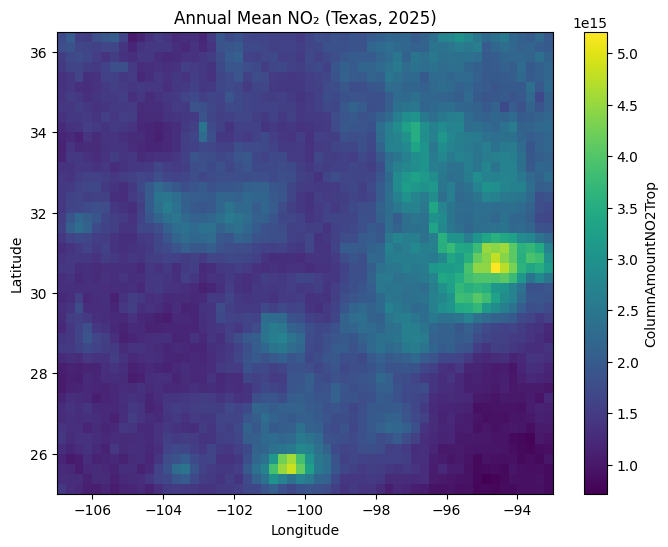

✅ Mean of daily means: 1831452647329189.0
✅ Overall mean from annual_mean: 1788509610311680.0

Annual mean shape: (46, 56)
Lat range: 25.125 to 36.375
Lon range: -106.875 to -93.125


In [270]:
# ==========================================
# Input and Output Paths
# ==========================================
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/2025/"
output_file = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_2025_annual_mean.nc"

# ==========================================
# Step 1: Collect all daily .nc files
# ==========================================
files = sorted(os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.nc'))
print(f"✅ Found {len(files)} files for 2025.")

# ==========================================
# Step 2: Open datasets without decoding time
# ==========================================
datasets = [xr.open_dataset(f, decode_times=False) for f in files]

# Identify the NO₂ variable name (same across all files)
var_name = list(datasets[0].data_vars.keys())[0]
print(f"✅ Variable name detected: {var_name}")

# ==========================================
# Step 3: Clean each dataset (Advanced Cleaning - NO upper bound)
# ==========================================
datasets_clean = []
for ds in datasets:
    data = ds[var_name]

    # Remove FillValue and missing_value
    if '_FillValue' in data.attrs:
        data = data.where(data != data.attrs['_FillValue'])
    if 'missing_value' in data.attrs:
        data = data.where(data != data.attrs['missing_value'])

    # Remove negative values only (keep all high values)
    data = data.where(data > 0)

    # Append cleaned data
    datasets_clean.append(data)

print("✅ Cleaning completed (Removed FillValue, missing values, negatives).")

# ==========================================
# Step 4: Combine cleaned datasets along a new dimension
# ==========================================
combined = xr.concat(datasets_clean, dim='time_index')

# ==========================================
# Step 5: Compute annual mean (skip NaN values)
# ==========================================
annual_mean = combined.mean(dim='time_index', skipna=True)

# ==========================================
# Step 6: Convert to Dataset and Save as NetCDF
# ==========================================
annual_mean_ds = annual_mean.to_dataset(name=var_name)
annual_mean_ds.to_netcdf(output_file)
print(f"✅ Annual mean NO₂ for 2025 saved at: {output_file}")

# ==========================================
# Step 7: Plot Annual Mean
# ==========================================
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='viridis')
plt.title("Annual Mean NO₂ (Texas, 2025)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# ==========================================
# Step 8: Verification
# ==========================================
# 1. Compare mean of daily means vs overall mean
daily_means = [float(ds[var_name].where(ds[var_name] > 0).mean()) for ds in datasets]
print("✅ Mean of daily means:", np.nanmean(daily_means))
print("✅ Overall mean from annual_mean:", float(annual_mean.mean()))

# 2. Print spatial info
print("\nAnnual mean shape:", annual_mean.shape)
print("Lat range:", annual_mean['lat'].values.min(), "to", annual_mean['lat'].values.max())
print("Lon range:", annual_mean['lon'].values.min(), "to", annual_mean['lon'].values.max())


# Trend Ananlysis

📈 Trend: 6.006e+12 molec/cm² per year
Starting year (2004): 1.525e+15 molec/cm²
Ending year (2025): 1.789e+15 molec/cm²


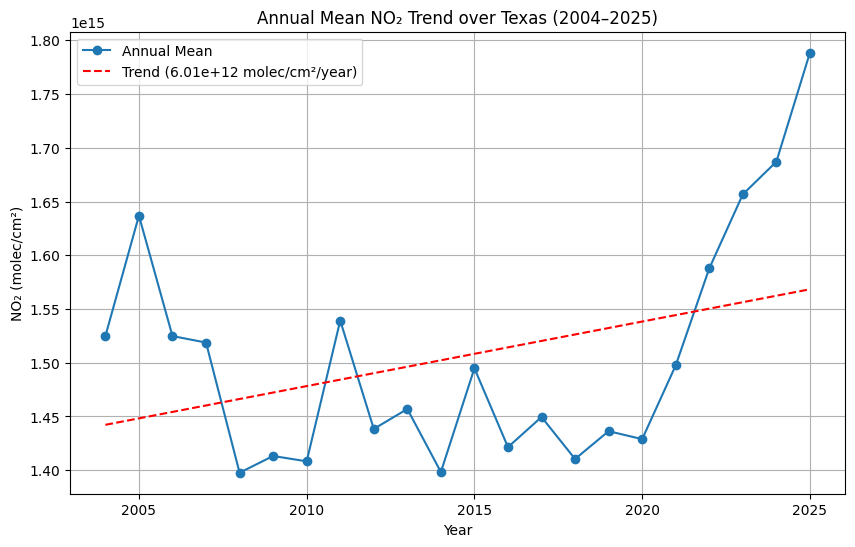

In [272]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from sklearn.linear_model import LinearRegression

# Directory where annual mean NO2 files are stored
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_Annual_Mean'
# Lists to store years and annual mean NO2 values
years = []
mean_values = []

# Loop through annual mean files
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.nc'):
        match = re.search(r'(\d{4})', filename)  # Extract year
        if match:
            year = int(match.group(1))
            file_path = os.path.join(input_dir, filename)
            
            # Open dataset
            ds = xr.open_dataset(file_path)
            
            # Compute spatial mean for Texas for that year
            mean_no2 = float(ds['ColumnAmountNO2Trop'].mean(skipna=True))
            ds.close()
            
            # Append year and mean NO2 value
            years.append(year)
            mean_values.append(mean_no2)

# Convert to numpy arrays
years = np.array(years).reshape(-1, 1)  # Shape (n, 1)
mean_values = np.array(mean_values)

# Linear regression for trend
model = LinearRegression()
model.fit(years, mean_values)
trend_slope = model.coef_[0]
trend_intercept = model.intercept_

# Print trend details
print(f"📈 Trend: {trend_slope:.3e} molec/cm² per year")
print(f"Starting year ({years[0][0]}): {mean_values[0]:.3e} molec/cm²")
print(f"Ending year ({years[-1][0]}): {mean_values[-1]:.3e} molec/cm²")

# Predict trend line
predicted = model.predict(years)

# Plot time series and trend line
plt.figure(figsize=(10, 6))
plt.plot(years.flatten(), mean_values, marker='o', label='Annual Mean')
plt.plot(years.flatten(), predicted, color='red', linestyle='--', label=f'Trend ({trend_slope:.2e} molec/cm²/year)')
plt.title('Annual Mean NO₂ Trend over Texas (2004–2025)')
plt.xlabel('Year')
plt.ylabel('NO₂ (molec/cm²)')
plt.grid(True)
plt.legend()
plt.show()


✅ Combined 22 years of NO₂ data from 2004 to 2025
✅ Trend calculation completed.


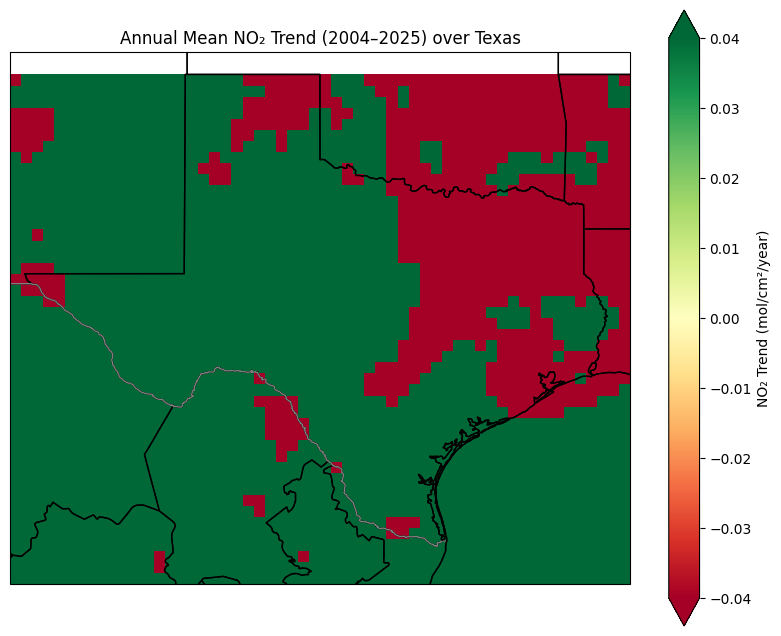

In [273]:
import os
import re
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ===========================
# USER INPUT
# ===========================
input_dir = '/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_Annual_Mean'  # Folder with annual NO₂ .nc files

# ===========================
# STEP 1: READ FILES AND COMBINE INTO DATAARRAY
# ===========================
files = sorted([f for f in os.listdir(input_dir) if f.endswith('.nc')])
years = []
datasets = []

for filename in files:
    match = re.search(r'(\d{4})', filename)
    if match:
        year = int(match.group(1))
        years.append(year)
        ds = xr.open_dataset(os.path.join(input_dir, filename))
        datasets.append(ds['ColumnAmountNO2Trop'])  # NO₂ variable name

# Combine into one DataArray with a time dimension
stacked_data = xr.concat(datasets, dim='time')
stacked_data['time'] = years

print(f"✅ Combined {len(years)} years of NO₂ data from {years[0]} to {years[-1]}")

# ===========================
# STEP 2: COMPUTE TREND AT EACH GRID CELL
# ===========================
time_index = np.arange(len(years))  # numeric time
lat_size = stacked_data.shape[1]
lon_size = stacked_data.shape[2]

slopes = np.full((lat_size, lon_size), np.nan)

for i in range(lat_size):
    for j in range(lon_size):
        y = stacked_data[:, i, j].values
        if np.isnan(y).all():
            continue
        mask = ~np.isnan(y)
        if mask.sum() > 1:
            model = LinearRegression()
            model.fit(time_index[mask].reshape(-1, 1), y[mask])
            slopes[i, j] = model.coef_[0]

trend = xr.DataArray(
    slopes,
    coords=[stacked_data.lat, stacked_data.lon],
    dims=['lat', 'lon'],
    name='NO2_Trend'
)

print("✅ Trend calculation completed.")

# ===========================
# STEP 3: PLOT TREND ON TEXAS MAP
# ===========================
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot trend map
trend_plot = trend.plot(ax=ax,
                        transform=ccrs.PlateCarree(),
                        cmap='RdYlGn',  # Red = positive trend, Green = negative
                        vmin=-0.04, vmax=0.04,
                        cbar_kwargs={'label': 'NO₂ Trend (mol/cm²/year)'})

# Add map features
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='gray')
ax.coastlines()
ax.set_extent([-107, -93, 25, 37], crs=ccrs.PlateCarree())

plt.title('Annual Mean NO₂ Trend (2004–2025) over Texas')
plt.show()


# Extracting Annual Mean Values from NetCDF Files to Run the Model

In [280]:
import os
import xarray as xr
import numpy as np

# Directory where annual mean files are stored
input_dir = "/Users/nawarajadhikari/Capstone_Project/OMI_NO2_Texas/Texas_Annual_Mean"  # Update path
years = np.arange(2004, 2026)

# List to store annual mean values
no2_means = []

for year in years:
    file_path = os.path.join(input_dir, f"Texas_{year}_annual_mean.nc")
    if os.path.exists(file_path):
        ds = xr.open_dataset(file_path)
        var_name = list(ds.data_vars.keys())[0]  # Detect variable name dynamically
        mean_val = float(ds[var_name].mean(skipna=True).values)  # Overall mean
        no2_means.append(mean_val)
        ds.close()
    else:
        print(f"⚠ Missing file for {year}")

print("\n✅ NO₂ annual mean values extracted successfully!")
print("Years:", list(years))
print("NO₂ Means:", no2_means)



✅ NO₂ annual mean values extracted successfully!
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
NO₂ Means: [1524839554744320.0, 1636896459456512.0, 1524839554744320.0, 1518794388275200.0, 1397675639439360.0, 1413243419492352.0, 1408279108386816.0, 1539261383835648.0, 1438415954378752.0, 1456996519772160.0, 1398307402285056.0, 1494860414582784.0, 1421499957248000.0, 1449515223613440.0, 1410449543266304.0, 1436346182795264.0, 1428918707945472.0, 1497592819089408.0, 1587810754625536.0, 1656719881011200.0, 1687122209669120.0, 1788509610311680.0]


# Linear Regression 

/Users/nawarajadhikari/anaconda3/envs/omi_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


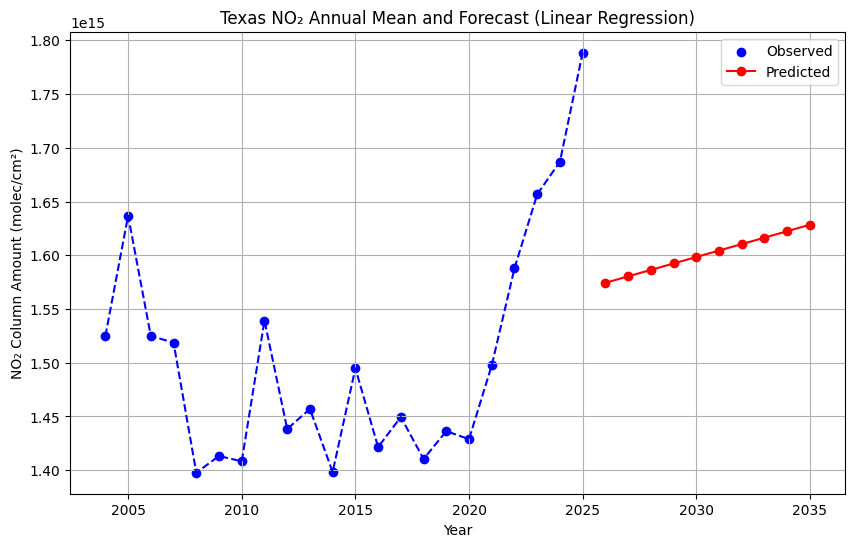


✅ Predicted NO₂ Levels for 2026–2035:
   Year  Predicted_NO2
0  2026   1.574381e+15
1  2027   1.580387e+15
2  2028   1.586393e+15
3  2029   1.592399e+15
4  2030   1.598404e+15
5  2031   1.604410e+15
6  2032   1.610416e+15
7  2033   1.616422e+15
8  2034   1.622428e+15
9  2035   1.628434e+15

Model R²: 0.1331


In [281]:
from sklearn.linear_model import LinearRegression

# Convert to DataFrame
df = pd.DataFrame({'Year': years, 'NO2_mean': no2_means})

# Prepare features
X = df[['Year']]
y = df['NO2_mean']

# Train Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predict future NO₂ (2026–2035)
future_years = np.arange(2026, 2036).reshape(-1, 1)
predictions = model.predict(future_years)

# Combine for visualization
future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_NO2': predictions})

# Plot observed and predicted
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['NO2_mean'], color='blue', label='Observed')
plt.plot(df['Year'], df['NO2_mean'], color='blue', linestyle='--')
plt.plot(future_df['Year'], future_df['Predicted_NO2'], color='red', marker='o', label='Predicted')
plt.title('Texas NO₂ Annual Mean and Forecast (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('NO₂ Column Amount (molec/cm²)')
plt.legend()
plt.grid()
plt.show()

# Display prediction table
print("\n✅ Predicted NO₂ Levels for 2026–2035:")
print(future_df)

# Model performance
r2 = model.score(X, y)
print(f"\nModel R²: {r2:.4f}")


# Random Forest Model

Model Performance: R² = 0.9507, RMSE = 2.32e+13

Predicted NO₂ Levels for 2026–2035:
2026: 1.7428e+15
2027: 1.7428e+15
2028: 1.7428e+15
2029: 1.7428e+15
2030: 1.7428e+15
2031: 1.7428e+15
2032: 1.7428e+15
2033: 1.7428e+15
2034: 1.7428e+15
2035: 1.7428e+15


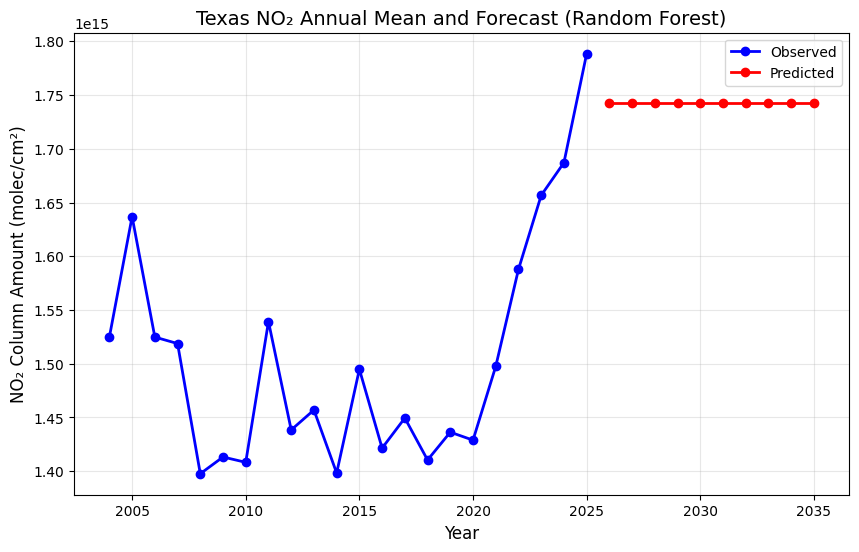

In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


future_years = np.arange(2026, 2036)

# Prepare data
X = years.reshape(-1, 1)
y = np.array(no2_means)

# ------------------------------
# Step 2: Train Random Forest
# ------------------------------
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X, y)

# ------------------------------
# Step 3: Predictions
# ------------------------------
# Predictions for future years
X_future = future_years.reshape(-1, 1)
y_pred_future = rf.predict(X_future)

# Predictions for training set (to evaluate)
y_pred_train = rf.predict(X)

# ------------------------------
# Step 4: Model Evaluation
# ------------------------------
r2 = r2_score(y, y_pred_train)
rmse = np.sqrt(mean_squared_error(y, y_pred_train))

print(f"Model Performance: R² = {r2:.4f}, RMSE = {rmse:.2e}")
print("\nPredicted NO₂ Levels for 2026–2035:")
for year, val in zip(future_years, y_pred_future):
    print(f"{year}: {val:.4e}")

# ------------------------------
# Step 5: Plot Observed & Predicted
# ------------------------------
plt.figure(figsize=(10, 6))

# Observed
plt.plot(years, y, 'bo-', label="Observed", linewidth=2)

# Predicted
plt.plot(future_years, y_pred_future, 'ro-', label="Predicted", linewidth=2)

# Labels
plt.title("Texas NO₂ Annual Mean and Forecast (Random Forest)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("NO₂ Column Amount (molec/cm²)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()
